<a href="https://colab.research.google.com/github/sindla97/Causal_inference_twins/blob/main/Causal_inference_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install dowhy
!pip install networkx==3.2
!pip install econml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 139.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.3/345.3 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 138.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully un

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
import numpy as np
from dowhy import CausalModel
import dowhy.datasets

In [31]:
import pandas as pd


tp_t=pd.read_csv('/content/twin_pairs_T_3years_samesex.csv')
tp_x=pd.read_csv('/content/twin_pairs_X_3years_samesex.csv')
tp_y=pd.read_csv('/content/twin_pairs_Y_3years_samesex.csv')

In [6]:
tp_t.head()

,Unnamed: 0,dbirwt_0,dbirwt_1
0,0,2268.0,2296.0
1,1,2610.0,2650.0
2,2,1985.0,2098.0
3,3,2410.0,2420.0
4,4,2013.0,2637.0


In [7]:
tp_x.head()

,Unnamed: 0.1,Unnamed: 0,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,...,feduc6,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg
0,0,0,1.0,1.0,1,1,3,0.0,1,NaN,...,NaN,1,0,NaN,NaN,NaN,NaN,5,5,1.0
1,1,1,1.0,1.0,1,1,3,0.0,2,3.0,...,NaN,7,6,2.0,3.0,2.0,1.0,5,5,5.0
2,2,2,1.0,1.0,1,1,5,0.0,1,5.0,...,3.0,11,10,NaN,NaN,NaN,NaN,5,5,1.0
3,3,3,1.0,1.0,1,1,4,0.0,2,1.0,...,1.0,15,14,4.0,4.0,1.0,2.0,5,5,5.0
4,4,4,1.0,1.0,1,1,5,0.0,2,4.0,...,NaN,23,22,NaN,NaN,NaN,NaN,5,5,5.0


pldel


(array([7.1069e+04, 0.0000e+00, 3.7000e+01, 0.0000e+00, 0.0000e+00,
        7.0000e+00, 0.0000e+00, 1.8500e+02, 0.0000e+00, 2.3000e+01]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

pldel
1.0    71069
4.0      185
2.0       37
5.0       23
3.0        7
Name: count, dtype: int64
birattnd


(array([68755.,     0.,  1788.,     0.,     0.,   339.,     0.,    89.,
            0.,   260.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

birattnd
1.0    68755
2.0     1788
3.0      339
5.0      260
4.0       89
Name: count, dtype: int64
brstate


(array([12649.,  6978.,  7768.,  8957.,  3635., 10013.,  9330.,  8863.,
         3088.,    64.]),
 array([ 1. ,  6.8, 12.6, 18.4, 24.2, 30. , 35.8, 41.6, 47.4, 53.2, 59. ]),
 <BarContainer object of 10 artists>)

brstate
5     8536
33    5315
44    4601
14    3733
10    3430
36    3313
39    3102
23    2997
34    1964
22    1950
11    1918
47    1862
31    1849
26    1591
15    1535
19    1376
43    1349
50    1280
48    1276
1     1246
24    1191
41    1159
3     1139
21    1115
6      932
25     881
7      865
38     816
18     794
17     751
37     722
45     704
16     678
4      602
28     521
32     412
29     406
49     404
12     380
20     328
30     302
13     277
27     236
8      222
40     218
42     209
2      194
35     171
9      163
46     138
51     127
57      45
59      13
55       6
52       1
Name: count, dtype: int64
stoccfipb


(array([11640.,  2321.,  9645.,  4992.,  8356.,  3147., 13086.,  4960.,
         8353.,  4845.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

stoccfipb
6     8517
36    5362
48    4661
17    3634
12    3421
39    3394
42    3142
26    2960
25    2002
37    1974
13    1942
51    1831
34    1745
29    1707
18    1518
47    1468
22    1382
55    1270
1     1233
53    1231
27    1171
4     1142
45    1115
24    1022
8      938
41     882
28     873
9      865
49     753
21     743
20     701
40     695
19     648
5      562
31     545
32     416
54     409
35     397
15     384
23     328
11     284
16     264
33     262
44     241
10     234
46     223
30     217
38     214
2      186
50     133
56     104
Name: count, dtype: int64
mager8


(array([  111.,  5991., 16374.,     0., 22898., 18123.,     0.,  6898.,
          925.,    25.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

mager8
4    22898
5    18123
3    16374
6     6898
2     5991
7      925
1      111
8       25
Name: count, dtype: int64
ormoth


(array([62068.,     0.,  4429.,     0.,   883.,     0.,   165.,     0.,
         1034.,   740.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

ormoth
0.0    62068
1.0     4429
4.0     1034
2.0      883
5.0      740
3.0      165
Name: count, dtype: int64
mrace


(array([5.6008e+04, 1.2820e+04, 5.5600e+02, 2.7700e+02, 0.0000e+00,
        1.3200e+02, 1.0300e+02, 3.7600e+02, 1.0330e+03, 4.0000e+01]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

mrace
1    56008
2    12820
8     1033
3      556
7      376
4      277
5      132
6      103
9       40
Name: count, dtype: int64
meduc6


(array([ 3089.,     0.,  9647.,     0.,     0., 25332.,     0., 14737.,
            0., 14201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

meduc6
3.0    25332
4.0    14737
5.0    14201
2.0     9647
1.0     3089
Name: count, dtype: int64
dmar


(array([18135.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 53210.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

dmar
1    53210
0    18135
Name: count, dtype: int64
mplbir


(array([8521., 4814., 8172., 8624., 3514., 9458., 9504., 6985., 3357.,
        8288.]),
 array([ 1. ,  6.8, 12.6, 18.4, 24.2, 30. , 35.8, 41.6, 47.4, 53.2, 59. ]),
 <BarContainer object of 10 artists>)

mplbir
33.0    5363
59.0    5288
5.0     5204
14.0    3751
36.0    3554
44.0    3416
39.0    3409
23.0    3116
57.0    2671
10.0    1704
15.0    1690
22.0    1679
34.0    1652
31.0    1645
26.0    1606
11.0    1544
19.0    1465
50.0    1361
1.0     1323
47.0    1320
43.0    1245
24.0    1170
41.0    1032
25.0    1011
18.0     913
48.0     907
21.0     895
16.0     863
7.0      706
17.0     693
37.0     680
4.0      643
3.0      627
6.0      621
38.0     603
45.0     586
49.0     533
28.0     522
52.0     416
9.0      412
32.0     380
20.0     299
42.0     291
12.0     273
13.0     262
35.0     239
27.0     238
40.0     226
55.0     180
30.0     179
8.0      175
56.0     137
29.0     137
51.0     129
46.0     127
2.0      103
54.0      12
53.0      11
Name: count, dtype: int64
mpre5


(array([55609.,     0.,     0., 11204.,     0.,     0.,  1662.,     0.,
            0.,  1243.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

mpre5
1.0    55609
2.0    11204
3.0     1662
4.0     1243
Name: count, dtype: int64
adequacy


(array([50664.,     0.,     0.,     0.,     0., 13422.,     0.,     0.,
            0.,  4090.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

adequacy
1.0    50664
2.0    13422
3.0     4090
Name: count, dtype: int64
orfath


(array([53160.,     0.,  4021.,     0.,   708.,     0.,   179.,     0.,
          882.,   573.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

orfath
0.0    53160
1.0     4021
4.0      882
2.0      708
5.0      573
3.0      179
Name: count, dtype: int64
frace


(array([5.1028e+04, 7.8860e+03, 3.9000e+02, 2.7300e+02, 0.0000e+00,
        1.3100e+02, 1.0400e+02, 3.0900e+02, 9.2500e+02, 3.9000e+01]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

frace
1.0    51028
2.0     7886
8.0      925
3.0      390
7.0      309
4.0      273
5.0      131
6.0      104
9.0       39
Name: count, dtype: int64
birmon


(array([11164.,  6104.,  5730.,  6046.,  5987.,  6339.,  6309.,  6026.,
         6032., 11608.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

birmon
7     6339
8     6309
3     6104
5     6046
10    6032
9     6026
6     5987
12    5889
1     5862
4     5730
11    5719
2     5302
Name: count, dtype: int64
gestat10


(array([   67.,  2832.,  4634., 17301.,  9124., 29131.,  4017.,  1592.,
         1999.,   648.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

gestat10
6     29131
4     17301
5      9124
3      4634
7      4017
2      2832
9      1999
8      1592
10      648
1        67
Name: count, dtype: int64
csex


(array([35427.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 35918.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

csex
1    35918
0    35427
Name: count, dtype: int64
anemia


(array([65022.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2083.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

anemia
0.0    65022
1.0     2083
Name: count, dtype: int64
cardiac


(array([66851.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   254.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

cardiac
0.0    66851
1.0      254
Name: count, dtype: int64
lung


(array([66873.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   232.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

lung
0.0    66873
1.0      232
Name: count, dtype: int64
diabetes


(array([65456.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1649.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

diabetes
0.0    65456
1.0     1649
Name: count, dtype: int64
herpes


(array([60402.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   377.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

herpes
0.0    60402
1.0      377
Name: count, dtype: int64
hydra


(array([63519.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   740.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

hydra
0.0    63519
1.0      740
Name: count, dtype: int64
hemo


(array([6.4227e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

hemo
0.0    64227
1.0       32
Name: count, dtype: int64
chyper


(array([66592.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   513.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

chyper
0.0    66592
1.0      513
Name: count, dtype: int64
phyper


(array([62826.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4279.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

phyper
0.0    62826
1.0     4279
Name: count, dtype: int64
eclamp


(array([66289.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   816.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

eclamp
0.0    66289
1.0      816
Name: count, dtype: int64
incervix


(array([63886.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   373.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

incervix
0.0    63886
1.0      373
Name: count, dtype: int64
pre4000


(array([63647.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   612.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

pre4000
0.0    63647
1.0      612
Name: count, dtype: int64
preterm


(array([63199.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1060.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

preterm
0.0    63199
1.0     1060
Name: count, dtype: int64
renal


(array([66929.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   176.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

renal
0.0    66929
1.0      176
Name: count, dtype: int64
rh


(array([65956.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   374.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

rh
0.0    65956
1.0      374
Name: count, dtype: int64
uterine


(array([62990.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   635.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

uterine
0.0    62990
1.0      635
Name: count, dtype: int64
othermr


(array([47617.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19488.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

othermr
0.0    47617
1.0    19488
Name: count, dtype: int64
tobacco


(array([43602.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  8489.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

tobacco
0.0    43602
1.0     8489
Name: count, dtype: int64
alcohol


(array([51999.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1423.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

alcohol
0.0    51999
1.0     1423
Name: count, dtype: int64
cigar6


(array([4.3602e+04, 0.0000e+00, 1.6550e+03, 0.0000e+00, 3.2270e+03,
        0.0000e+00, 2.6900e+03, 0.0000e+00, 4.3500e+02, 2.0000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

cigar6
0.0    43602
2.0     3227
3.0     2690
1.0     1655
4.0      435
5.0       20
Name: count, dtype: int64
drink5


(array([51999.,     0.,   695.,     0.,     0.,   140.,     0.,    83.,
            0.,   109.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

drink5
0.0    51999
1.0      695
2.0      140
4.0      109
3.0       83
Name: count, dtype: int64
crace


(array([5.4937e+04, 1.3462e+04, 7.1400e+02, 3.0700e+02, 0.0000e+00,
        1.6300e+02, 1.5900e+02, 4.1400e+02, 1.1370e+03, 5.2000e+01]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

crace
1    54937
2    13462
8     1137
3      714
7      414
4      307
5      163
6      159
9       52
Name: count, dtype: int64
data_year


(array([22664.,     0.,     0.,     0.,     0., 24124.,     0.,     0.,
            0., 24557.]),
 array([89. , 89.2, 89.4, 89.6, 89.8, 90. , 90.2, 90.4, 90.6, 90.8, 91. ]),
 <BarContainer object of 10 artists>)

data_year
91    24557
90    24124
89    22664
Name: count, dtype: int64
nprevistq


(array([14876.,     0., 15123.,     0.,     0., 14104.,     0., 11475.,
            0., 13417.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

nprevistq
1.0    15123
0.0    14876
2.0    14104
4.0    13417
3.0    11475
Name: count, dtype: int64
dfageq


(array([10082.,  6207.,  7514.,     0.,  8078.,  7583.,     0.,  6421.,
         8427.,  5916.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

dfageq
0.0    10082
6.0     8427
3.0     8078
4.0     7583
2.0     7514
5.0     6421
1.0     6207
7.0     5916
Name: count, dtype: int64
feduc6


(array([ 2724.,     0.,  5560.,     0.,     0., 21669.,     0., 10941.,
            0., 15772.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

feduc6
3.0    21669
5.0    15772
4.0    10941
2.0     5560
1.0     2724
Name: count, dtype: int64
infant_id_0


(array([6664., 7085., 7151., 6789., 7386., 7451., 7100., 7023., 7361.,
        7335.]),
 array([1.000000e+00, 2.790710e+04, 5.581320e+04, 8.371930e+04,
        1.116254e+05, 1.395315e+05, 1.674376e+05, 1.953437e+05,
        2.232498e+05, 2.511559e+05, 2.790620e+05]),
 <BarContainer object of 10 artists>)

infant_id_0
279062    1
1         1
7         1
11        1
15        1
         ..
67        1
69        1
71        1
75        1
76        1
Name: count, Length: 71345, dtype: int64
infant_id_1


(array([6663., 7086., 7151., 6789., 7386., 7450., 7101., 7023., 7360.,
        7336.]),
 array([     0. ,  27906.1,  55812.2,  83718.3, 111624.4, 139530.5,
        167436.6, 195342.7, 223248.8, 251154.9, 279061. ]),
 <BarContainer object of 10 artists>)

infant_id_1
279061    1
0         1
6         1
10        1
14        1
         ..
66        1
68        1
70        1
74        1
77        1
Name: count, Length: 71345, dtype: int64
dlivord_min


(array([4.5629e+04, 1.5471e+04, 1.6790e+03, 1.0400e+03, 1.5500e+02,
        1.1600e+02, 2.1000e+01, 4.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

dlivord_min
1.0     24650
2.0     20979
3.0     10930
4.0      4541
5.0      1679
6.0       723
7.0       317
8.0       155
9.0        81
10.0       35
11.0       14
12.0        7
13.0        4
15.0        3
14.0        2
17.0        1
Name: count, dtype: int64
dtotord_min


(array([3.8255e+04, 1.9266e+04, 4.9040e+03, 1.1630e+03, 3.0600e+02,
        9.1000e+01, 2.9000e+01, 7.0000e+00, 4.0000e+00, 2.0000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

dtotord_min
1.0     19507
2.0     18748
3.0     12510
4.0      6756
5.0      3300
6.0      1604
7.0       770
8.0       393
9.0       196
10.0      110
11.0       62
12.0       29
13.0       17
14.0       12
15.0        6
17.0        3
19.0        1
21.0        1
16.0        1
18.0        1
Name: count, dtype: int64
bord_0


(array([30431.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 33690.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

bord_0
2.0    33690
1.0    30431
Name: count, dtype: int64
bord_1


(array([33690.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 30431.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

bord_1
1.0    33690
2.0    30431
Name: count, dtype: int64
brstate_reg


(array([ 3801., 10279., 12858.,  5112.,     0., 12238.,  4270.,  7346.,
         4233., 11208.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

brstate_reg
2    12858
4    12238
8    11208
1    10279
6     7346
3     5112
5     4270
7     4233
0     3801
Name: count, dtype: int64
stoccfipb_reg


(array([ 3831., 10249., 12776.,  5209.,     0., 12232.,  4317.,  7300.,
         4231., 11200.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

stoccfipb_reg
2    12776
4    12232
8    11200
1    10249
6     7300
3     5209
5     4317
7     4231
0     3831
Name: count, dtype: int64
mplbir_reg


(array([ 3216., 15705., 13472.,  5384.,     0.,  9820.,  4492.,  8875.,
         2980.,  7293.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

mplbir_reg
1.0    15705
2.0    13472
4.0     9820
6.0     8875
8.0     7293
3.0     5384
5.0     4492
0.0     3216
7.0     2980
Name: count, dtype: int64


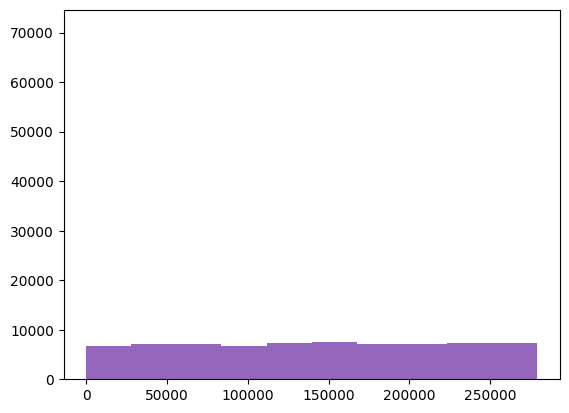

In [25]:
##Impute Null values
import matplotlib.pyplot as plt
for i in tp_x.columns:
  if  i not in ['Unnamed: 0.1','Unnamed: 0']:
    print(i)
    display(plt.hist(tp_x[i]))
    print(tp_x[i].value_counts())

In [32]:
#dropping brstate, stoccfipb, mplbir becasue of high cardinality
tp_x.drop(['brstate', 'stoccfipb', 'mplbir'],axis=1, inplace=True)

In [37]:

from sklearn.impute import SimpleImputer


# Impute missing values for all columns (numerical + categorical separately if needed)
imputer = SimpleImputer(strategy='most_frequent')  # or use 'mean' for numeric only
for  i in tp_x.columns:
  if i not in ['bord_1','Unnamed: 0.1', 'Unnamed: 0' ]:
    tp_x[i] = imputer.fit_transform(tp_x.loc[:,[i]])


In [43]:
tp_x['bord_1']=tp_x.apply(lambda x: x['bord_1'] if x['bord_1']>0 else 3-x['bord_0'], axis=1)
tp_x.isnull().sum().sum()

0

In [14]:
dtype=pd.DataFrame({'adequacy': ['cat'],
 'alcohol': 'bin',
 'anemia': 'bin',
 'birattnd': 'cat',
 'birmon': 'cyc',
 'bord': 'bin',
 'brstate': 'cat',
 'brstate_reg': 'cat',
 'cardiac': 'bin',
 'chyper': 'bin',
 'cigar6': 'cat',
 'crace': 'cat',
 'csex': 'bin',
 'data_year': 'cat',
 'dfageq': 'cat',
 'diabetes': 'bin',
 'dlivord_min': 'ord',
 'dmar': 'bin',
 'drink5': 'cat',
 'dtotord_min': 'ord',
 'eclamp': 'bin',
 'feduc6': 'cat',
 'frace': 'cat',
 'gestat10': 'cat',
 'hemo': 'bin',
 'herpes': 'bin',
 'hydra': 'bin',
 'incervix': 'bin',
 'infant_id': 'index do not use',
 'lung': 'bin',
 'mager8': 'cat',
 'meduc6': 'cat',
 'mplbir': 'cat',
 'mpre5': 'cat',
 'mrace': 'cat',
 'nprevistq': 'cat',
 'orfath': 'cat',
 'ormoth': 'cat',
 'othermr': 'bin',
 'phyper': 'bin',
 'pldel': 'cat',
 'pre4000': 'bin',
 'preterm': 'bin',
 'renal': 'bin',
 'rh': 'bin',
 'stoccfipb': 'cat',
 'stoccfipb_reg': 'cat',
 'tobacco': 'bin',
 'uterine': 'bin'}).T.reset_index()

In [15]:
feat_desc=pd.DataFrame({'adequacy': ['adequacy of care'],
 'alcohol': 'risk factor, alcohol use',
 'anemia': 'risk factor, Anemia',
 'birattnd': 'medical person attending birth',
 'birmon': 'birth month Jan-Dec',
 'bord_0': 'birth order of lighter twin',
 'bord_1': 'birth order of heavier twin',
 'brstate': 'state of residence NCHS',
 'brstate_reg': 'US census region of brstate',
 'cardiac': 'risk factor, Cardiac',
 'chyper': 'risk factor, Hypertension, chronic',
 'cigar6': 'num of cigarettes /day, quantiled',
 'crace': 'race of child',
 'csex': 'sex of child',
 'data_year': 'year: 1989, 1990 or 1991',
 'dfageq': 'octile age of father',
 'diabetes': 'risk factor, Diabetes',
 'dlivord_min': 'number of live births before twins',
 'dmar': 'married',
 'drink5': 'num of drinks /week, quantiled',
 'dtotord_min': 'total number of births before twins',
 'eclamp': 'risk factor, Eclampsia',
 'feduc6': 'education category',
 'frace': 'dad race',
 'gestat10': 'gestation 10 categories',
 'hemo': 'risk factor Hemoglobinopathy',
 'herpes': 'risk factor, Herpes',
 'hydra': 'risk factor Hvdramnios/Oliqohvdramnios',
 'incervix': 'risk factor, Incompetent cervix',
 'infant_id_0': 'infant id of lighter twin in original df',
 'infant_id_1': 'infant id of heavier twin in original df',
 'lung': 'risk factor, Lung',
 'mager8': 'mom age',
 'meduc6': 'mom education',
 'mplbir': 'mom place of birth',
 'mplbir_reg': 'US census region of mplbir',
 'mpre5': 'trimester prenatal care begun, 4 is none',
 'mrace': 'mom race',
 'nprevistq': 'quintile number of prenatal visits',
 'orfath': 'dad hispanic',
 'ormoth': 'mom hispanic',
 'othermr': 'risk factor, Other Medical Risk Factors',
 'phyper': 'risk factor, Hypertension, preqnancy-associated',
 'pldel': 'place of delivery',
 'pre4000': 'risk factor, Previous infant 4000+ grams',
 'preterm': 'risk factor, Previos pre-term or small',
 'renal': 'risk factor, Renal disease',
 'rh': 'risk factor, RH sensitization',
 'stoccfipb': 'state of occurence FIPB',
 'stoccfipb_reg': 'US census region of stoccfipb',
 'tobacco': 'risk factor, tobacco use',
 'uterine': 'risk factor, Uterine bleeding'}).T.reset_index()

In [17]:
features=feat_desc.merge(dtype,how='inner', on ='index')
features

,index,0_x,0_y
0,adequacy,adequacy of care,cat
1,alcohol,"risk factor, alcohol use",bin
2,anemia,"risk factor, Anemia",bin
3,birattnd,medical person attending birth,cat
4,birmon,birth month Jan-Dec,cyc
5,brstate,state of residence NCHS,cat
6,brstate_reg,US census region of brstate,cat
7,cardiac,"risk factor, Cardiac",bin
8,chyper,"risk factor, Hypertension, chronic",bin
9,cigar6,"num of cigarettes /day, quantiled",cat


In [8]:
tp_y.head()

,Unnamed: 0,mort_0,mort_1
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0
3,3,0.0,0.0
4,4,0.0,0.0


In [9]:
print(tp_y.shape, tp_x.shape, tp_t.shape)

(71345, 3) (71345, 54) (71345, 3)


In [44]:
df=tp_t.merge(tp_y, how ='inner', on='Unnamed: 0')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71345 entries, 0 to 71344
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  71345 non-null  int64  
 1   dbirwt_0    71345 non-null  float64
 2   dbirwt_1    71345 non-null  float64
 3   mort_0      71345 non-null  float64
 4   mort_1      71345 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.7 MB


In [45]:
df['heavy_1']=df.apply(lambda x: 1 if x['dbirwt_1']> x['dbirwt_0'] else 0 , axis=1)
df['heavy']=df.apply(lambda x: 1 if x['dbirwt_0']> x['dbirwt_1'] else 0 , axis=1)
df

,Unnamed: 0,dbirwt_0,dbirwt_1,mort_0,mort_1,heavy_1,heavy
0,0,2268.0,2296.0,0.0,0.0,1,0
1,1,2610.0,2650.0,0.0,0.0,1,0
2,2,1985.0,2098.0,0.0,0.0,1,0
3,3,2410.0,2420.0,0.0,0.0,1,0
4,4,2013.0,2637.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...
71340,71340,2807.0,3260.0,0.0,0.0,1,0
71341,71341,2510.0,2650.0,0.0,0.0,1,0
71342,71342,2130.0,2175.0,0.0,0.0,1,0
71343,71343,2693.0,3317.0,0.0,0.0,1,0


In [46]:
temp_df=df[['Unnamed: 0','dbirwt_1', 'mort_1', 'heavy_1']]
temp_df=temp_df.rename(columns={'dbirwt_1':'dbirwt_0', 'mort_1':'mort_0', 'heavy_1':'heavy'})
temp_df

,Unnamed: 0,dbirwt_0,mort_0,heavy
0,0,2296.0,0.0,1
1,1,2650.0,0.0,1
2,2,2098.0,0.0,1
3,3,2420.0,0.0,1
4,4,2637.0,0.0,1
...,...,...,...,...
71340,71340,3260.0,0.0,1
71341,71341,2650.0,0.0,1
71342,71342,2175.0,0.0,1
71343,71343,3317.0,0.0,1


In [47]:
concat_df=pd.concat([df[['Unnamed: 0','dbirwt_0', 'mort_0', 'heavy']],temp_df],axis=0)

In [48]:
final_df=concat_df.merge(tp_x,how='inner',on='Unnamed: 0')
final_df

,Unnamed: 0,dbirwt_0,mort_0,heavy,Unnamed: 0.1,pldel,birattnd,mager8,ormoth,mrace,...,feduc6,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg
0,0,2268.0,0.0,0,0,1.0,1.0,3,0.0,1,...,3.0,1,0,1.0,1.0,2.0,1.0,5,5,1.0
1,1,2610.0,0.0,0,1,1.0,1.0,3,0.0,2,...,3.0,7,6,2.0,3.0,2.0,1.0,5,5,5.0
2,2,1985.0,0.0,0,2,1.0,1.0,5,0.0,1,...,3.0,11,10,1.0,1.0,2.0,1.0,5,5,1.0
3,3,2410.0,0.0,0,3,1.0,1.0,4,0.0,2,...,1.0,15,14,4.0,4.0,1.0,2.0,5,5,5.0
4,4,2013.0,0.0,0,4,1.0,1.0,5,0.0,2,...,3.0,23,22,1.0,1.0,2.0,1.0,5,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142685,71340,3260.0,0.0,1,71340,1.0,1.0,4,0.0,3,...,3.0,279048,279047,5.0,5.0,2.0,1.0,7,7,7.0
142686,71341,2650.0,0.0,1,71341,1.0,1.0,4,0.0,3,...,2.0,279050,279049,6.0,7.0,2.0,1.0,7,7,7.0
142687,71342,2175.0,0.0,1,71342,1.0,1.0,2,0.0,1,...,2.0,279057,279058,1.0,1.0,1.0,2.0,7,7,8.0
142688,71343,3317.0,0.0,1,71343,1.0,1.0,5,0.0,1,...,5.0,279060,279059,3.0,3.0,2.0,1.0,7,7,7.0


In [17]:
final_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [49]:
final_df['bord']=final_df.apply(lambda x: x['bord_0'] if x['heavy']==0 else x['bord_1'], axis=1)


,Unnamed: 0,dbirwt_0,mort_0,heavy,Unnamed: 0.1,pldel,birattnd,mager8,ormoth,mrace,...,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg,bord
0,0,2268.0,0.0,0,0,1.0,1.0,3,0.0,1,...,1,0,1.0,1.0,2.0,1.0,5,5,1.0,2.0
1,1,2610.0,0.0,0,1,1.0,1.0,3,0.0,2,...,7,6,2.0,3.0,2.0,1.0,5,5,5.0,2.0
2,2,1985.0,0.0,0,2,1.0,1.0,5,0.0,1,...,11,10,1.0,1.0,2.0,1.0,5,5,1.0,2.0
3,3,2410.0,0.0,0,3,1.0,1.0,4,0.0,2,...,15,14,4.0,4.0,1.0,2.0,5,5,5.0,1.0
4,4,2013.0,0.0,0,4,1.0,1.0,5,0.0,2,...,23,22,1.0,1.0,2.0,1.0,5,5,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142685,71340,3260.0,0.0,1,71340,1.0,1.0,4,0.0,3,...,279048,279047,5.0,5.0,2.0,1.0,7,7,7.0,1.0
142686,71341,2650.0,0.0,1,71341,1.0,1.0,4,0.0,3,...,279050,279049,6.0,7.0,2.0,1.0,7,7,7.0,1.0
142687,71342,2175.0,0.0,1,71342,1.0,1.0,2,0.0,1,...,279057,279058,1.0,1.0,1.0,2.0,7,7,8.0,2.0
142688,71343,3317.0,0.0,1,71343,1.0,1.0,5,0.0,1,...,279060,279059,3.0,3.0,2.0,1.0,7,7,7.0,1.0


In [50]:
final_df.drop(columns=['bord_1','bord_0','Unnamed: 0','Unnamed: 0.1','infant_id_0','infant_id_1'],inplace=True)
final_df

,dbirwt_0,mort_0,heavy,pldel,birattnd,mager8,ormoth,mrace,meduc6,dmar,...,data_year,nprevistq,dfageq,feduc6,dlivord_min,dtotord_min,brstate_reg,stoccfipb_reg,mplbir_reg,bord
0,2268.0,0.0,0,1.0,1.0,3,0.0,1,3.0,1,...,89,4.0,0.0,3.0,1.0,1.0,5,5,1.0,2.0
1,2610.0,0.0,0,1.0,1.0,3,0.0,2,3.0,0,...,89,3.0,0.0,3.0,2.0,3.0,5,5,5.0,2.0
2,1985.0,0.0,0,1.0,1.0,5,0.0,1,5.0,1,...,89,1.0,6.0,3.0,1.0,1.0,5,5,1.0,2.0
3,2410.0,0.0,0,1.0,1.0,4,0.0,2,1.0,1,...,89,1.0,6.0,1.0,4.0,4.0,5,5,5.0,1.0
4,2013.0,0.0,0,1.0,1.0,5,0.0,2,4.0,0,...,89,2.0,0.0,3.0,1.0,1.0,5,5,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142685,3260.0,0.0,1,1.0,1.0,4,0.0,3,4.0,0,...,91,1.0,0.0,3.0,5.0,5.0,7,7,7.0,1.0
142686,2650.0,0.0,1,1.0,1.0,4,0.0,3,3.0,0,...,91,0.0,5.0,2.0,6.0,7.0,7,7,7.0,1.0
142687,2175.0,0.0,1,1.0,1.0,2,0.0,1,2.0,1,...,91,0.0,0.0,2.0,1.0,1.0,7,7,8.0,2.0
142688,3317.0,0.0,1,1.0,1.0,5,0.0,1,5.0,1,...,91,1.0,4.0,5.0,3.0,3.0,7,7,7.0,1.0


In [51]:
for i in final_df.columns:
  if i in ['dbirwt_0']:
    final_df[i]=final_df[i].astype('category')

In [52]:
model=CausalModel(data=final_df,
             treatment='heavy',
             outcome='mort_0',
             common_causes=[x for x in final_df.columns if x not in ['heavy','mort_0']])

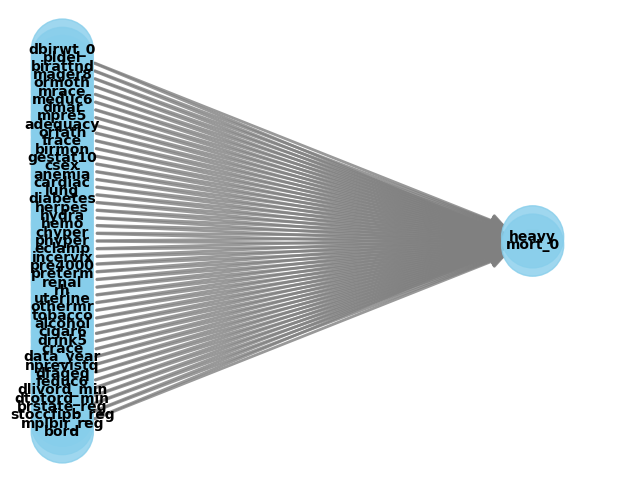

In [53]:
model.view_model()

In [54]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
────────(E[mort_0|tobacco,mplbir_reg,dbirwt_0,eclamp,chyper,rh,frace,birmon,re ↪
d[heavy]                                                                       ↪

↪                                                                              ↪
↪ nal,drink5,herpes,preterm,mrace,hemo,phyper,bord,pre4000,anemia,gestat10,bir ↪
↪                                                                              ↪

↪                                                                              ↪
↪ attnd,hydra,meduc6,incervix,adequacy,cardiac,feduc6,cigar6,dmar,alcohol,dfag ↪
↪                                                                              ↪

↪                                                                              ↪
↪ eq,lung,diabetes,data_year,brstate_reg,ormoth,othermr,uterine,stoccfipb_reg,

In [55]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
────────(E[mort_0|tobacco,mplbir_reg,dbirwt_0,eclamp,chyper,rh,frace,birmon,re ↪
d[heavy]                                                                       ↪

↪                                                                              ↪
↪ nal,drink5,herpes,preterm,mrace,hemo,phyper,bord,pre4000,anemia,gestat10,bir ↪
↪                                                                              ↪

↪                                                                              ↪
↪ attnd,hydra,meduc6,incervix,adequacy,cardiac,feduc6,cigar6,dmar,alcohol,dfag ↪
↪                                                                              ↪

↪                                                                              ↪
↪ eq,lung,diabetes,data_year,b

In [56]:
import econml
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from econml.inference import BootstrapInference
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                     target_units ='ate',
                                method_params={"init_params":{'model_y':HistGradientBoostingRegressor(),
                                                              'model_t': HistGradientBoostingRegressor(),
                                                              "model_final":HistGradientBoostingRegressor()},
                                               "fit_params":{}})
print(dml_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
────────(E[mort_0|tobacco,mplbir_reg,dbirwt_0,eclamp,chyper,rh,frace,birmon,re ↪
d[heavy]                                                                       ↪

↪                                                                              ↪
↪ nal,drink5,herpes,preterm,mrace,hemo,phyper,bord,pre4000,anemia,gestat10,bir ↪
↪                                                                              ↪

↪                                                                              ↪
↪ attnd,hydra,meduc6,incervix,adequacy,cardiac,feduc6,cigar6,dmar,alcohol,dfag ↪
↪                                                                              ↪

↪                                                                              ↪
↪ eq,lung,diabetes,data_year,b

The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.


## Graphical Causal Models

In [57]:
from dowhy import gcm

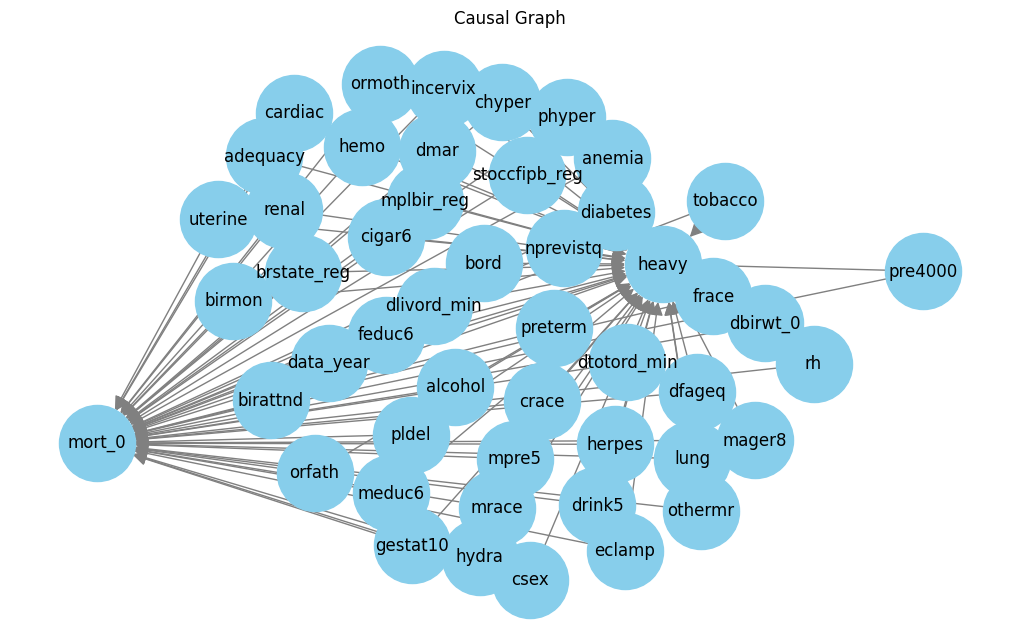

In [68]:
import networkx as nx
G = model._graph._graph  # Or whatever variable contains your DiGraph

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # You can use other layouts like nx.shell_layout, nx.circular_layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=12, arrowsize=20)
plt.title("Causal Graph")
plt.show()

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.


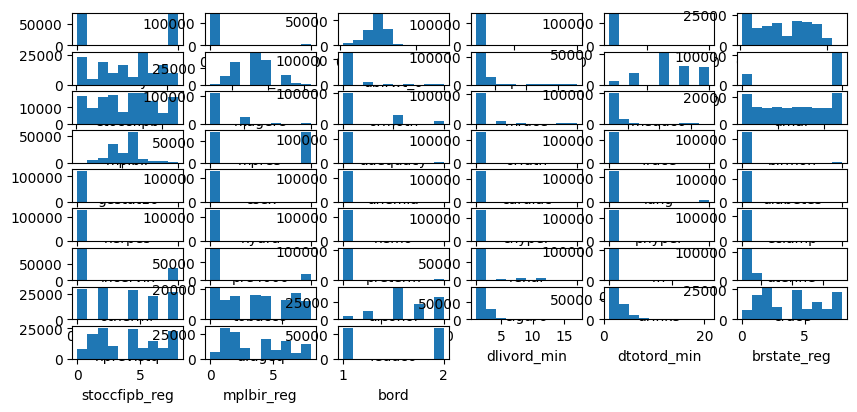

In [54]:
import matplotlib.pyplot as plt

cols = ['heavy', 'mort_0']
cols.extend([x for x in final_df.columns if x not in ['heavy','mort_0']])
plt.figure(figsize=(10,5))
for i, col in enumerate(cols):
    plt.subplot(10,6,i+1)
    plt.grid(False)
    plt.hist(final_df[col])
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [59]:
causal_model = gcm.StructuralCausalModel(model._graph._graph)

In [73]:
final_df.columns

Index(['dbirwt_0', 'mort_0', 'heavy', 'pldel', 'birattnd', 'mager8', 'ormoth',
       'mrace', 'meduc6', 'dmar', 'mpre5', 'adequacy', 'orfath', 'frace',
       'birmon', 'gestat10', 'csex', 'anemia', 'cardiac', 'lung', 'diabetes',
       'herpes', 'hydra', 'hemo', 'chyper', 'phyper', 'eclamp', 'incervix',
       'pre4000', 'preterm', 'renal', 'rh', 'uterine', 'othermr', 'tobacco',
       'alcohol', 'cigar6', 'drink5', 'crace', 'data_year', 'nprevistq',
       'dfageq', 'feduc6', 'dlivord_min', 'dtotord_min', 'brstate_reg',
       'stoccfipb_reg', 'mplbir_reg', 'bord', 'propensity_score', 'strata',
       'dbar', 'd_y', 'dbar_y'],
      dtype='object')

In [75]:
causal_model.set_causal_mechanism('heavy', gcm.ClassifierFCM(gcm.ml.create_random_forest_classifier()))
causal_model.set_causal_mechanism('mort_0', gcm.ClassifierFCM(gcm.ml.create_random_forest_classifier()))
for covariate in [x for x in final_df.columns if x not in ['heavy','mort_0','propensity_score','strata','dbar', 'd_y', 'dbar_y']]:
  #print(covariate)
  causal_model.set_causal_mechanism(covariate, gcm.EmpiricalDistribution())

In [77]:
final_df['mort_0']=final_df['mort_0'].astype('str')
final_df['heavy']=final_df['heavy'].astype('str')

In [78]:
gcm.fit(causal_model, final_df)

Fitting causal mechanism of node bord: 100%|██████████| 49/49 [00:42<00:00,  1.14it/s]


In [ ]:
gcm.